# 911 Calls Data Analysis Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 

## Data and Setup

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the CSV File

In [167]:
df = pd.read_csv('911.csv')

### Checking the info() of the df

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Checking the data

In [169]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Questions

What are the top 5 zipcodes for 911 calls?

In [170]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

What are the top 5 townships (twp) for 911 calls?

In [171]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

how many unique title codes are there?

In [172]:
df['title'].nunique()

110

## Creating new features

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

In [173]:
df['Reason'] = df['title'].apply(lambda s: s.split()[0][:-1])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


What is the most common Reason for a 911 call based off of this new column?

In [174]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Countplot of 911 calls by Reason.

<Axes: xlabel='Reason', ylabel='count'>

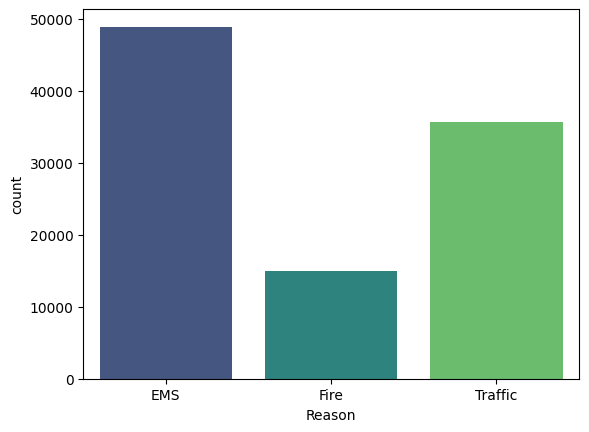

In [175]:
sns.countplot(data = df, x = 'Reason', palette = 'viridis')

Using [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.

In [176]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

**Now the timestamp column are actually DateTime objects, we can use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column.**

In [177]:
def getDay(time):
    week_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    return week_days[time.day % 7]

df['Hour'] = df['timeStamp'].apply(lambda time : time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(getDay)


In [178]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu


**Create a countplot of the Day of Week column with the hue based off of the Reason column.**

<Axes: xlabel='Day of Week', ylabel='count'>

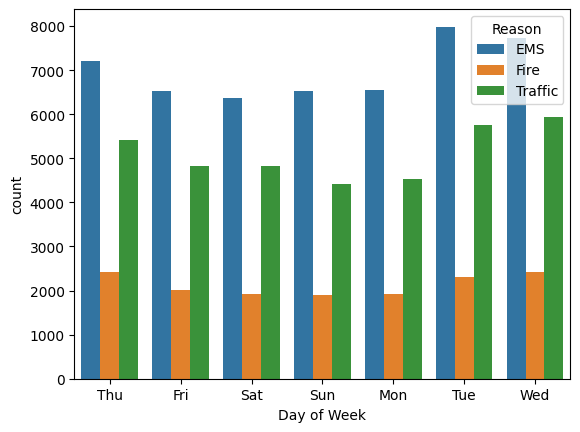

In [179]:
sns.countplot(x = 'Day of Week', data = df, hue = 'Reason')

**Same for Month:**

<Axes: xlabel='Month', ylabel='count'>

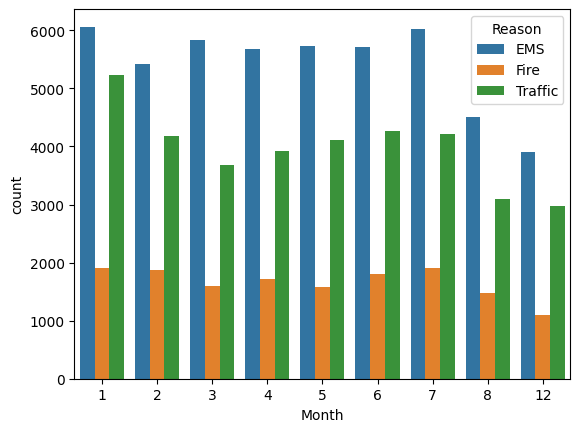

In [180]:
sns.countplot(data = df, x = 'Month', hue = 'Reason')

Creating a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation.

In [181]:
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


Creating a simple plot off of the dataframe indicating the count of calls per month.

<Axes: xlabel='Month'>

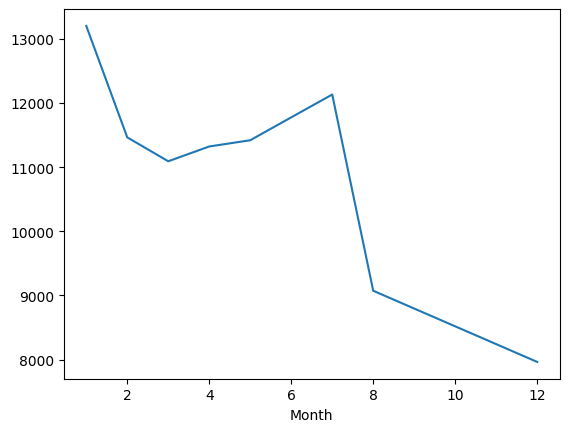

In [182]:
byMonth['twp'].plot()

Using seaborn's lmplot() to create a linear fit on the number of calls per month.

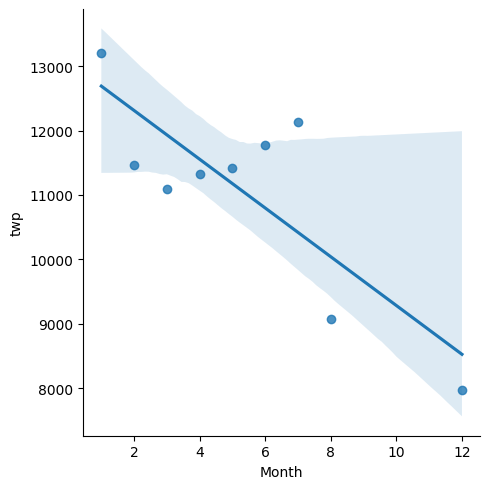

In [183]:
sns.lmplot(data = byMonth.reset_index(), y = 'twp', x = 'Month')

Creating a new column called 'Date' that contains the date from the timeStamp column.

In [184]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

Now groupby this Date column with the count() aggregate and creating a plot of counts of 911 calls.

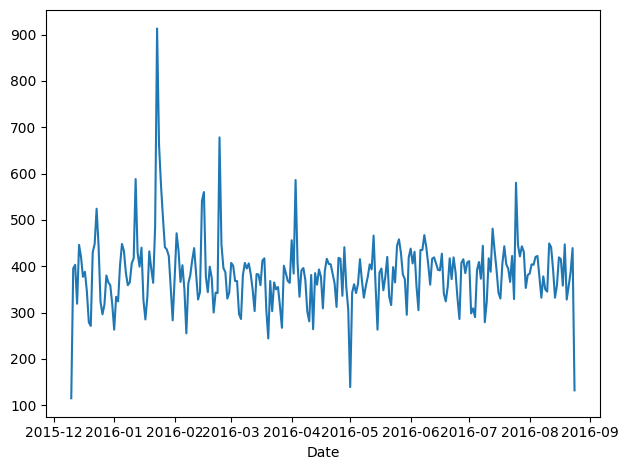

In [185]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

Recreating this plot but create 3 separate plots with each plot representing a Reason for the 911 call

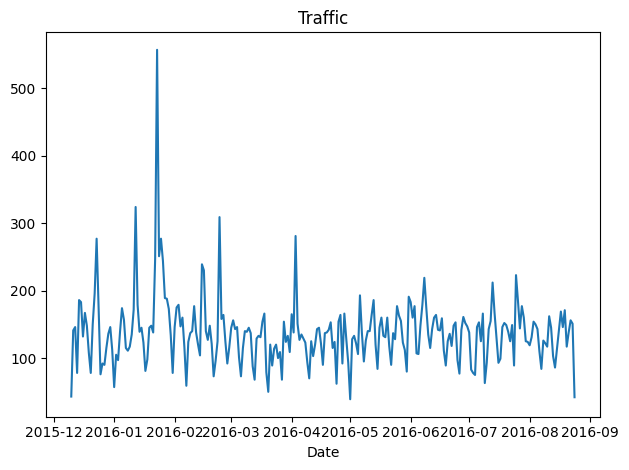

In [186]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.title("Traffic")
plt.tight_layout()

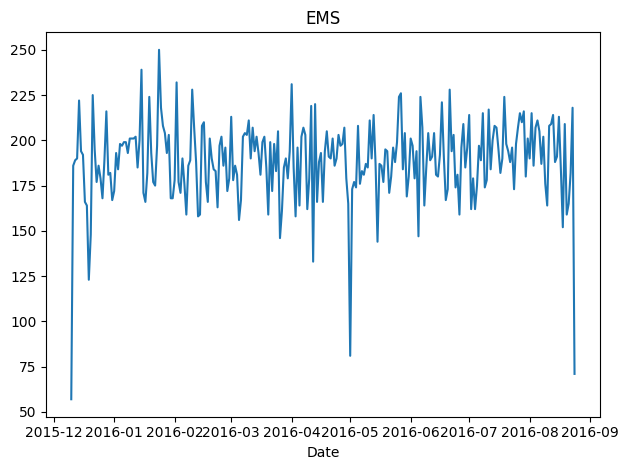

In [187]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.title("EMS")
plt.tight_layout()

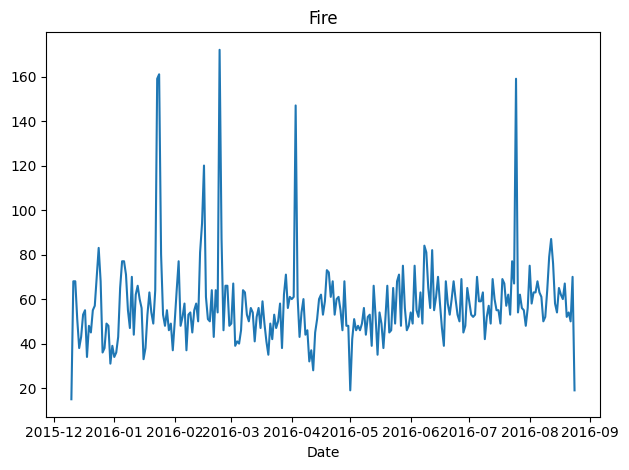

In [188]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.title("Fire")
plt.tight_layout()

Let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

<Axes: xlabel='Hour', ylabel='Day of Week'>

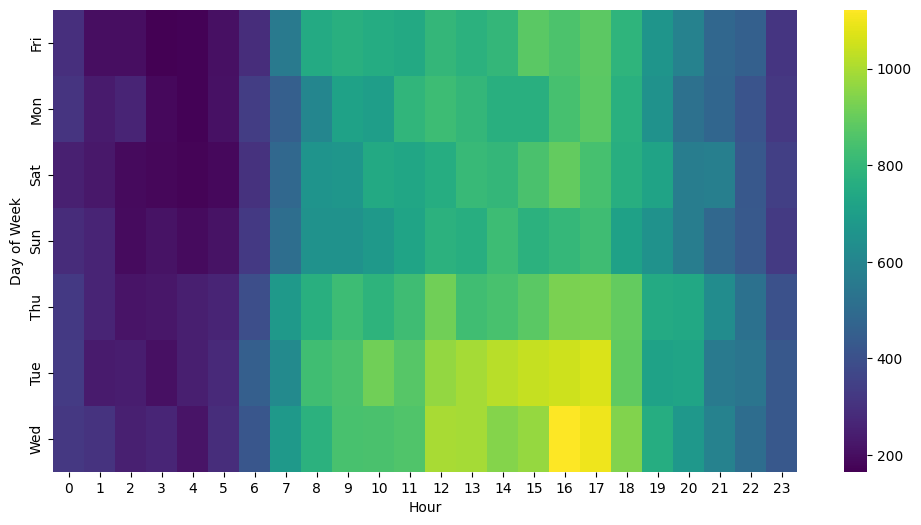

In [189]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.groupby(['Day of Week', 'Hour']).count()['Reason'].unstack(), cmap = 'viridis')

Now for a DataFrame that shows the Month as the column.

<Axes: xlabel='Month', ylabel='Day of Week'>

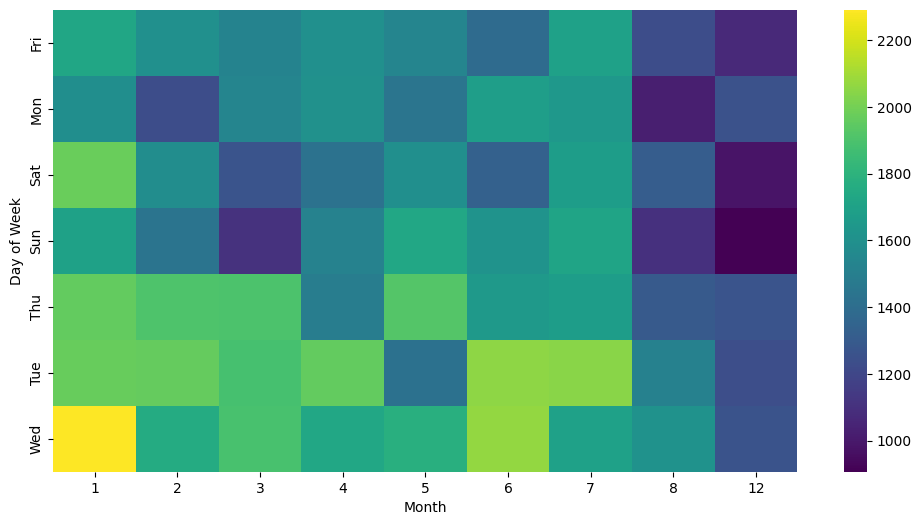

In [190]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.groupby(['Day of Week', 'Month']).count()['Reason'].unstack(), cmap = 'viridis')
